## My Submission

Read the data:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Import Dataset

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Descriptive Statistics and Visualization

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:ylabel='MEDV'>

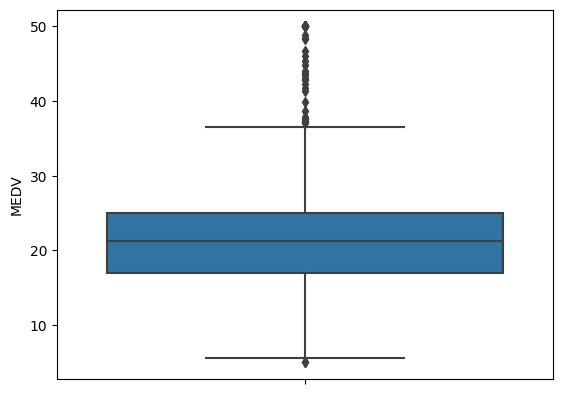

In [7]:
sns.boxplot(y="MEDV", data=boston_df)

<AxesSubplot:ylabel='CHAS'>

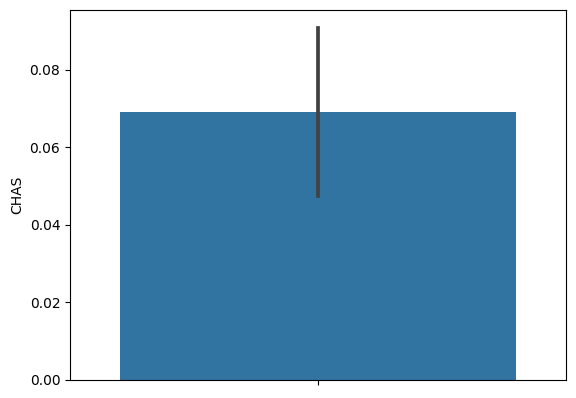

In [8]:
sns.barplot(y="CHAS", data=boston_df)

In [19]:
boston_df['age-binned'] = pd.cut(boston_df['AGE'], [0,35,70,200], labels=["<=35", "35-70", ">=70"], include_lowest=True )
boston_df[['AGE', 'age-binned']].head()

,AGE,age-binned
0,65.2,35-70
1,78.9,>=70
2,61.1,35-70
3,45.8,35-70
4,54.2,35-70


<AxesSubplot:xlabel='age-binned', ylabel='MEDV'>

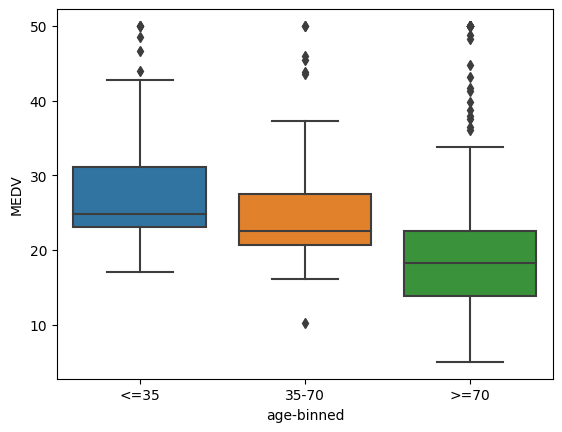

In [20]:
sns.boxplot(x="age-binned", y="MEDV", data=boston_df)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

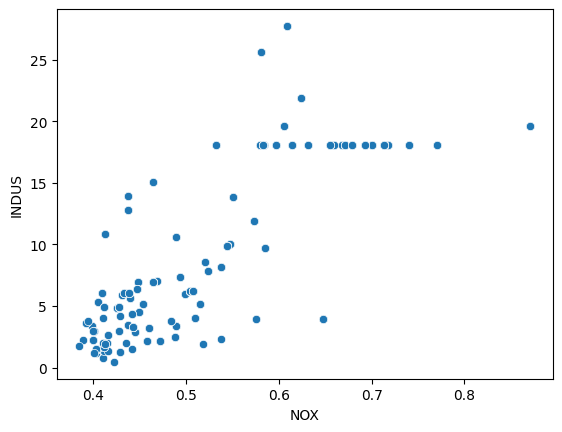

In [12]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

There seems to be a correlation between proportion of non retail acres per town and nitric oxides concentration!

<AxesSubplot:xlabel='Count', ylabel='PTRATIO'>

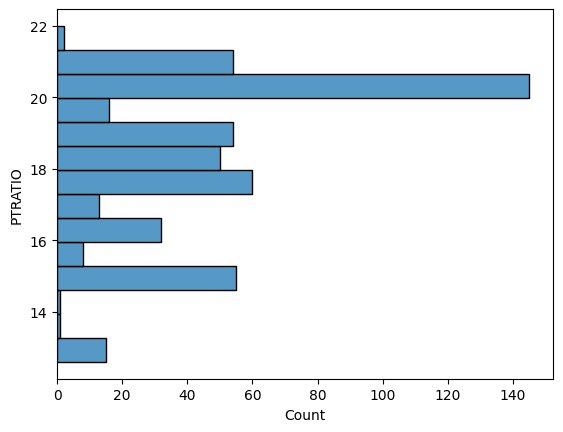

In [13]:
sns.histplot(y="PTRATIO", data=boston_df)

### Answer Provided Questions

In [15]:
import scipy.stats

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: No differrence in median value of houses bounded by Charles River

In [16]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0 ]['MEDV'], boston_df[boston_df['CHAS'] == 1 ]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Conclusion: Reject H0 -> There is a significant different in median values of houses!

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: No difference in median values of houses 

In [22]:
fvalue, pvalue = scipy.stats.f_oneway(
    boston_df[boston_df["age-binned"] == "<=35"]["MEDV"],
    boston_df[boston_df["age-binned"] == "35-70"]["MEDV"],
    boston_df[boston_df["age-binned"] == ">=70"]["MEDV"]
)
print(fvalue, pvalue)

36.40764999196599 1.7105011022702984e-15


Conclusion: Reject H0 -> There is a difference in medain values of houses!

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: No relationship between nitric oxide concentration and proportion of non-retail business acres per town.

In [23]:
scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])

(0.7636514469209154, 7.913361061236894e-98)

Reject H0 -> There is a relationship!

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: No correlation between additional weighted distance to five Boston employment centres to medium value of owner occupied homes.

In [25]:
import statsmodels.api as sm

regression_model = sm.OLS(boston_df['MEDV'], boston_df['DIS']).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                   1.52e-146
Time:                        19:42:42   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: Reject H0 -> Distance has ingluence on medium values.